In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
from statsmodels.api import Logit,add_constant
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("bank-full.csv",sep=';')
data=pd.read_csv("bank-full.csv",sep=';')
data['y'].value_counts(1)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
print('The number of rows is',df.shape[0])
print('The number of columns is',df.shape[1])

The number of rows is 45211
The number of columns is 17


In [6]:
df_categorical = df.select_dtypes(include=np.object)
df_categorical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [7]:
df_numerical = df.select_dtypes(include=np.number)
df_numerical.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [8]:
df1=df.select_dtypes(include
                     =np.number)

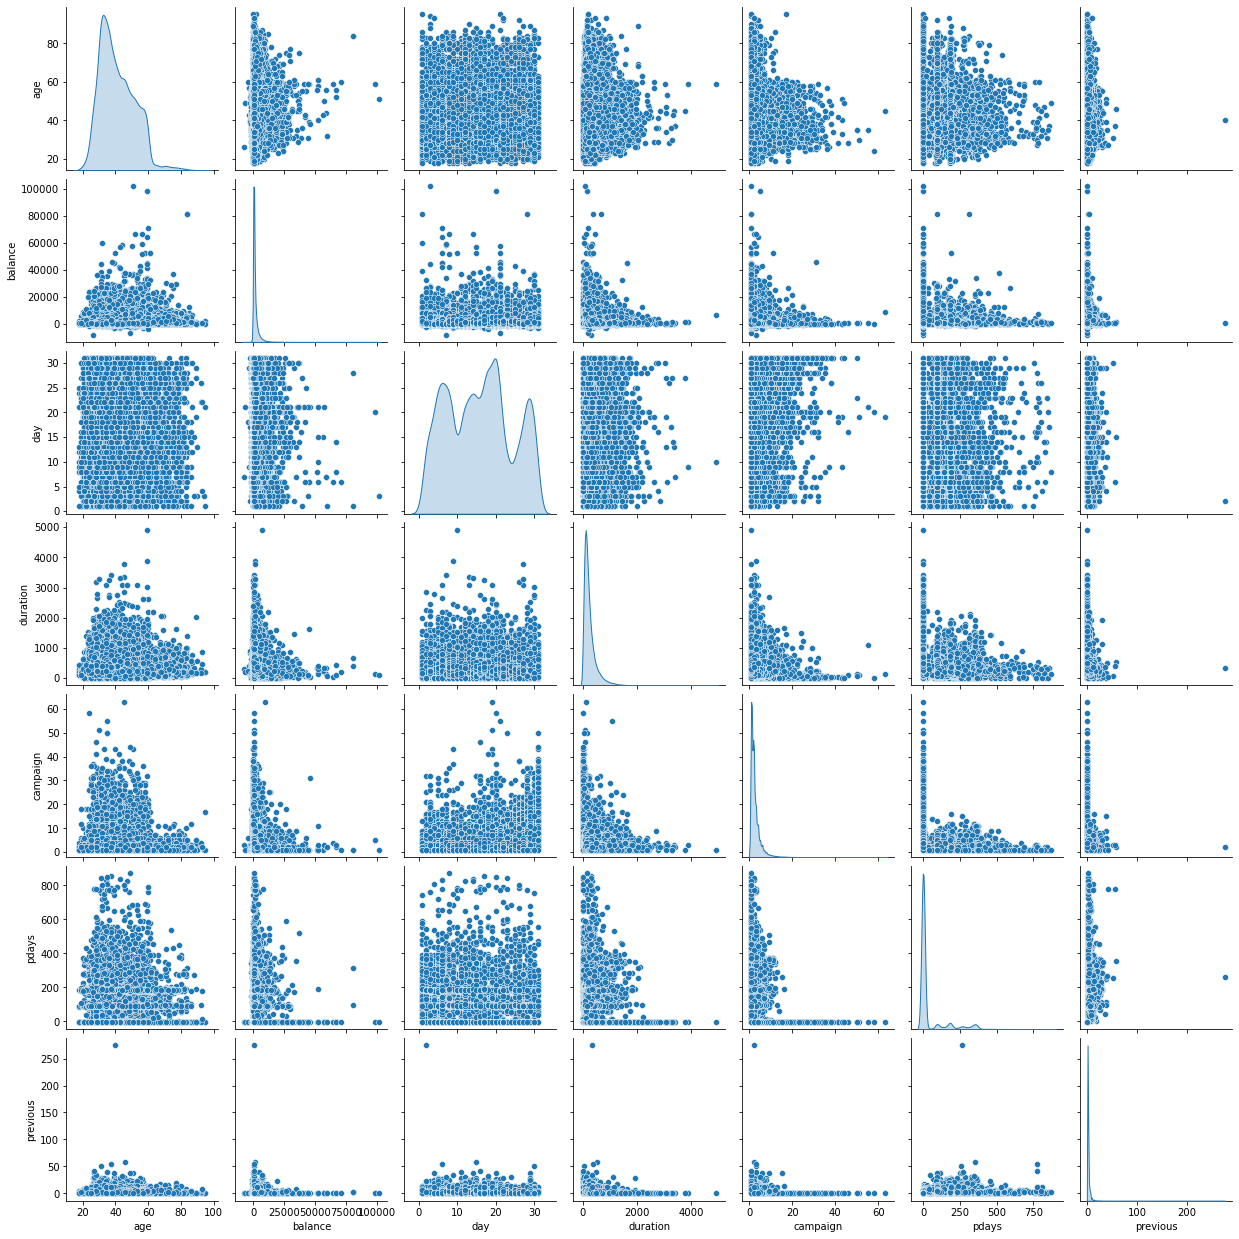

In [9]:
#Exploratory Data Analysis
#lets start by plotting pairplot
sns.pairplot(df,diag_kind='kde')
#from the below pairplot we can observe that there is no linear association between predictor and target variable

In [10]:
pd.crosstab(df['job'],df['education'])

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,3758,5371,149,454
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,7801,242
retired,795,984,366,119
self-employed,130,577,833,39
services,345,3457,202,150
student,44,508,223,163


In [11]:
#there are few entries in job and education that are labelled as unknown so we are going to treat them 
#accordingly
df.loc[(df['age']>60) & (df['job']=='unknown'),'job']='retired'
df.loc[(df['education']=='unknown') & (df['job']=='admin.'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='blue-collar'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='entrepreneur'), 'education'] = 'tertiary'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] =  'primary'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'tertiary'
df.loc[(df['education']=='unknown') & (df['job']=='retired'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='self-employed'), 'education'] = 'tertiary'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='student'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='technician'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='unemployed'), 'education'] = 'secondary'

In [12]:
df['education'].value_counts()

secondary    24541
tertiary     13658
primary       6896
unknown        116
Name: education, dtype: int64

In [13]:
df.loc[(df['education']=='unknown') & (df['job']=='unknown'), 'education'] = 'secondary'

In [14]:
pd.crosstab(df['education'],df['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
primary,209,3758,183,672,294,796,130,345,44,158,257,50
secondary,4390,5825,542,395,1121,1119,577,3607,671,5471,757,182
tertiary,572,149,762,173,8043,371,872,202,223,1968,289,34


In [15]:
df.loc[(df['education']=='secondary') & (df['job']=='unknown'), 'job'] = 'blue-collar'
df.loc[(df['education']=='tertiary') & (df['job']=='unknown'), 'job'] ='management' 
df.loc[(df['education']=='primary') & (df['job']=='unknown'), 'job'] = 'blue-collar'

In [16]:
df['pdays'].value_counts(1)
df['pdays'].replace(0,-1,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [18]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


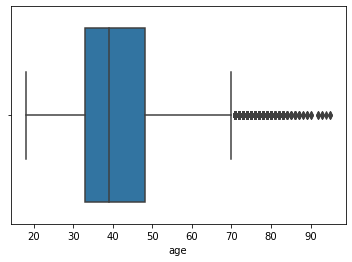

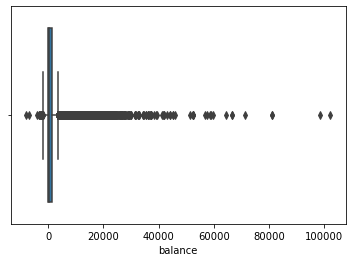

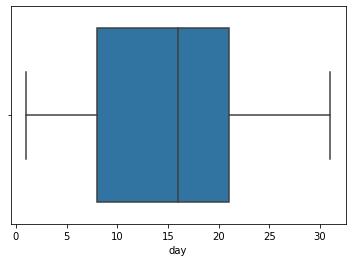

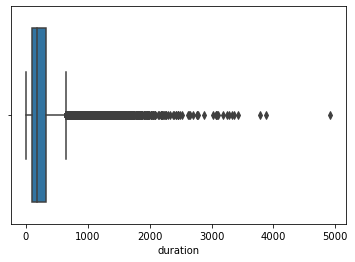

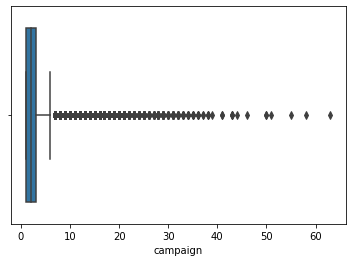

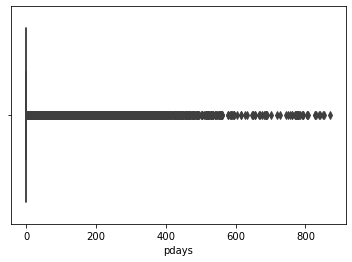

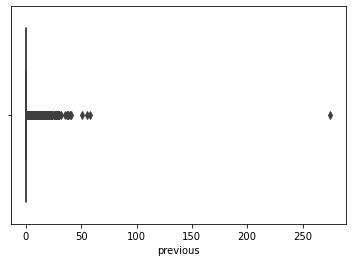

In [19]:
df_num=df.select_dtypes(['int64','float64'])
skewness=[]
for x in df_num.columns:
    sns.boxplot(df_num[x])
    plt.show()
    skewness.append([x,df_num[x].skew()])
#there are so many attributes with so many outliers which posess vital information according to the 
#domain perspective so we transform them if necessary after inspecting the distribution and skewness

41.84645447266292


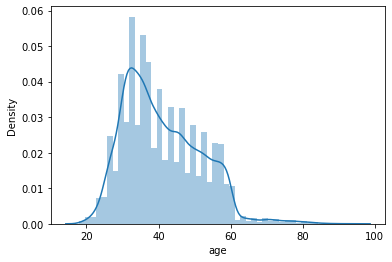

41.84645447266292


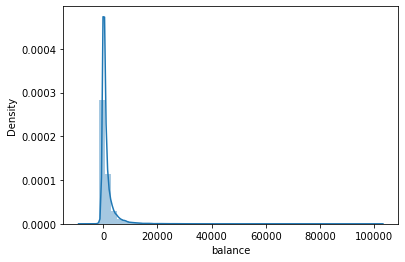

41.84645447266292


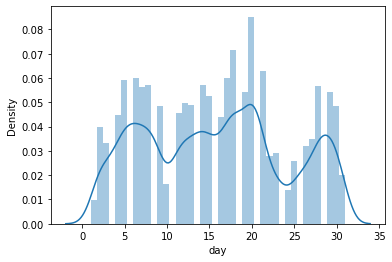

41.84645447266292


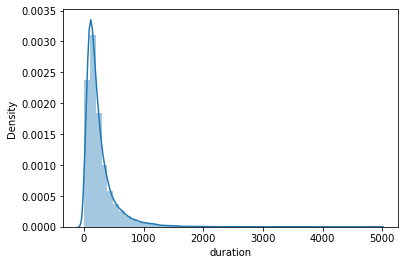

41.84645447266292


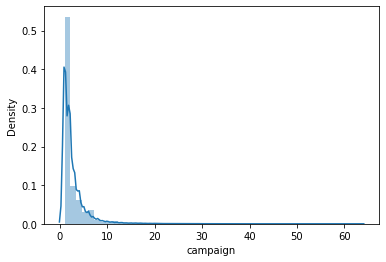

41.84645447266292


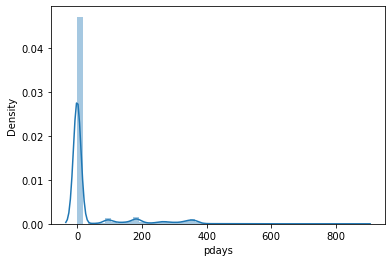

41.84645447266292


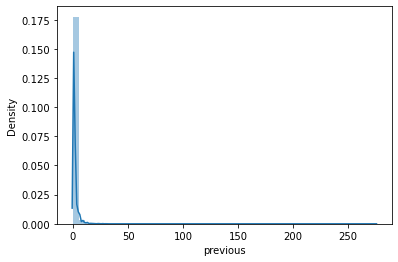

In [20]:
#EDA
#univariate analysis can be done using the diagonal plots in pairplot
for z in df.select_dtypes(np.number).columns:
    sns.distplot(df[z])
    print(df[x].skew())
    plt.show()
#so we perform perform power transformer

In [21]:
#bi-variate analysis

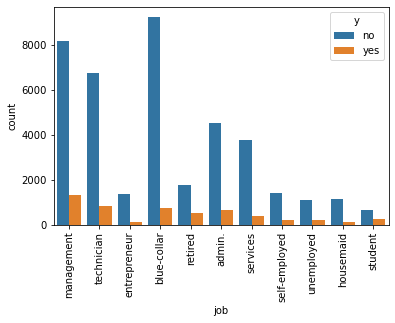

In [22]:
#lets try to analyze the relationship between job and success rate
sns.countplot(df['job'],hue=data['y'])
plt.xticks(rotation=90)
plt.show()

In [23]:
#from the above graph we can observe that maximum success can be obtained for 
# management,technician,blue collar,retired,admin classes

In [24]:
dfs=df[df['y']=='yes']
dfs.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [25]:
#calculating . success rates for each class
suc_ratesj=(dfs.groupby('job')['y'].count()/data.groupby('job')['y'].count())*100
pot=suc_ratesj
suc_ratesj=pd.DataFrame(suc_ratesj)
suc_ratesj.sort_values(by='y',inplace=True,ascending=False)
suc_ratesj.reset_index(inplace=True)
suc_ratesj.drop('y',axis=1,inplace=True)

In [26]:
dic=dict(suc_ratesj.items())
dic=dict(dic['job'])
pot

job
admin.           12.202669
blue-collar       7.552404
entrepreneur      8.271688
housemaid         8.790323
management       13.797843
retired          22.924028
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown                NaN
Name: y, dtype: float64

<AxesSubplot:xlabel='job'>

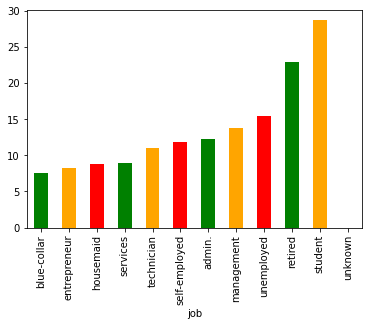

In [27]:
pot.sort_values().plot(kind='bar',color=['green','orange','red'])
#highest success rate is obtained for student class

<AxesSubplot:xlabel='marital', ylabel='count'>

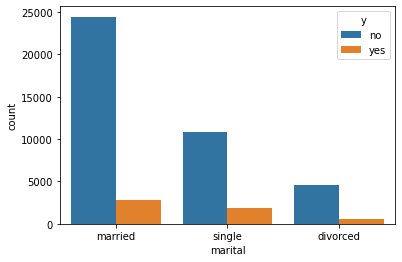

In [28]:
#bi-variate analysis between marital status and subscription to the term deposit
sns.countplot(data['marital'],hue=data['y'])

In [29]:
suc_ratesm=(dfs.groupby('marital')['y'].count()/data.groupby('marital')['y'].count())*100

In [30]:
pot=suc_ratesm
pot=pd.DataFrame(suc_ratesm)
pot.sort_values(by='y',inplace=True,ascending=False)
pot.reset_index(inplace=True)
pot.drop('y',axis=1,inplace=True)
dic1=dict(pot)
dic1=dict(dic1['marital'])
dic1

{0: 'single', 1: 'divorced', 2: 'married'}

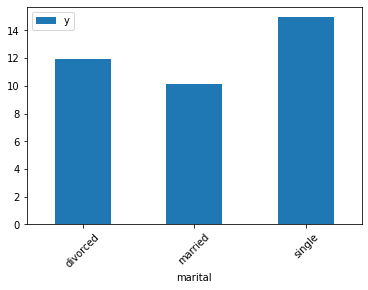

In [31]:
suc_ratesm.plot(kind='bar')
plt.xticks(rotation=45)
plt.legend()
plt.show()
#single person tends to subscribe to our term deposits and success rate is high for this class

<AxesSubplot:xlabel='default'>

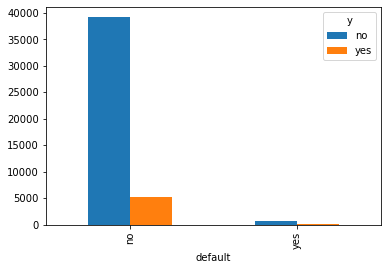

In [32]:
#bi-variate analysis between default feature and class
pd.crosstab(data['default'],df['y']).plot(kind='bar')

In [33]:
suc_ratesd=(dfs.groupby('default')['y'].count()/data.groupby('default')['y'].count())*100

<AxesSubplot:xlabel='default'>

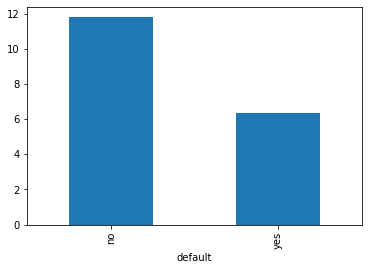

In [34]:
suc_ratesd.plot(kind='bar')
#success rates for people who are defaulters is less than who are not

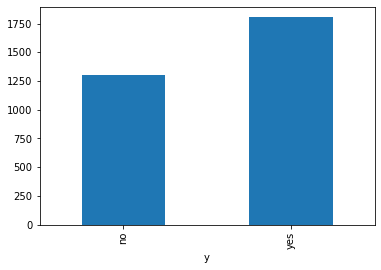

In [35]:
data.groupby('y')['balance'].mean().plot(kind='bar')
plt.show()
#people who tend to opt for our subscription maintain 500 Euros balance more than the other class on an avg

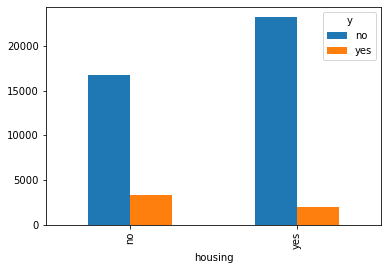

In [36]:
#bi-variate analysis between housing and class
pd.crosstab(df['housing'],df['y']).plot(kind='bar')
plt.show()
#as we can clearly see in the below graph people with no house loan tend to subscribe more than people with house loan

<AxesSubplot:xlabel='loan'>

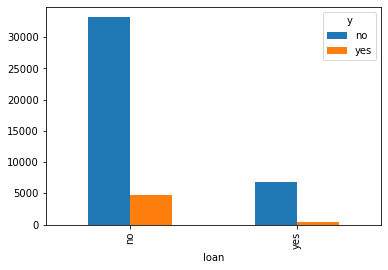

In [37]:
#bi-variate analysis between loan and class
pd.crosstab(df['loan'],df['y']).plot(kind='bar')
#most people who subscribed our term deposit do not have any loans to take care off

<AxesSubplot:xlabel='month'>

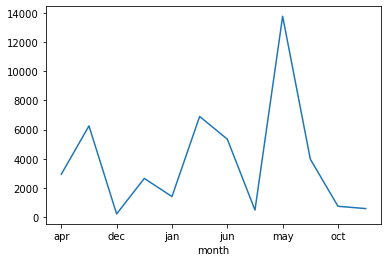

In [38]:
#analyzing the trend of telephone campain with respect to the months of the year
df.groupby('month')['month'].count().plot()
#here we can see that maximum telephone campaigning was done during the month of may 

{0: 'mar',
 1: 'dec',
 2: 'sep',
 3: 'oct',
 4: 'apr',
 5: 'feb',
 6: 'aug',
 7: 'jun',
 8: 'nov',
 9: 'jan',
 10: 'jul',
 11: 'may'}

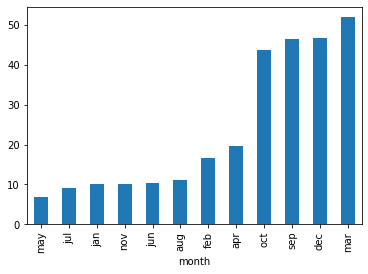

In [39]:
suc_ratemo=(dfs.groupby('month')['y'].count()/data.groupby('month')['y'].count())*100
suc_ratemo.sort_values().plot(kind='bar')
suc_ratemo=pd.DataFrame(suc_ratemo)
pot4=suc_ratemo.sort_values(by='y',ascending=False)
pot4.reset_index(inplace=True)
pot4.drop('y',axis=1,inplace=True)
pot4=dict(pot4)
pot4=dict(pot4['month'])
pot4
#highest success rate is obtained during march,december,september,oct respectively

<AxesSubplot:xlabel='month'>

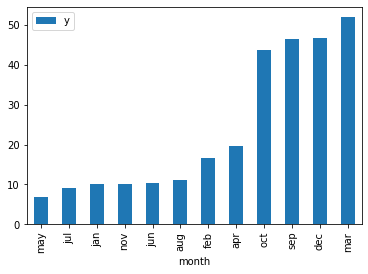

In [40]:
suc_ratemo.sort_values(by='y').plot(kind='bar')

#highest success rate is obtained during march,december,september,oct respectively

<AxesSubplot:xlabel='y'>

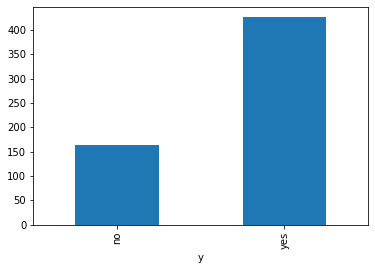

In [41]:
#bi-variate analysis  between duration and class
data.groupby('y')['duration'].median().plot(kind='bar')

In [42]:
df['y'].value_counts()
#class 2 is our minority class so its positive

no     39922
yes     5289
Name: y, dtype: int64

In [43]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [44]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 465        1
 529        1
 18         1
 434        1
 831        1
Name: pdays, Length: 559, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='y'>

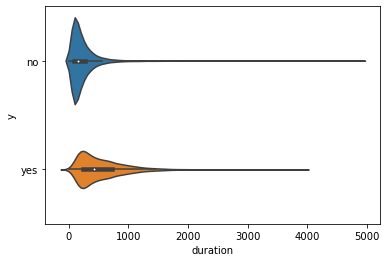

In [45]:
sns.violinplot(data['duration'],data['y'],split=True)
# Most of the people who have rejected the subscription to term deposit tend to talk less with the
# campaigners, those are the people who are not intrested in opting term deposit.
# Also, there are people who have spoke for long duration ,those are the people who are looking for
# best term deposit policies and they tend to enquire more about the policies to opt for the best plan

# The average talktime of the people who have subscribed the term deposit it slightly more compared to
# those have not subscribed.

In [46]:
data['pdays'].replace(-1,0,inplace=True)

In [47]:
df['job'].value_counts()

blue-collar      9964
management       9492
technician       7597
admin.           5171
services         4154
retired          2286
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

<AxesSubplot:xlabel='campaign', ylabel='y'>

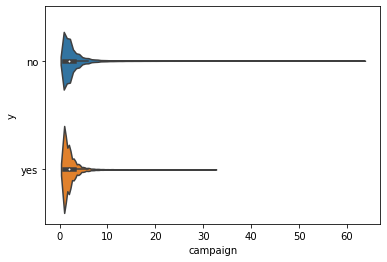

In [48]:
#bi-variate analysis between campaign and target
sns.violinplot(data['campaign'],data['y'],figsize=250*1000)

<AxesSubplot:xlabel='y'>

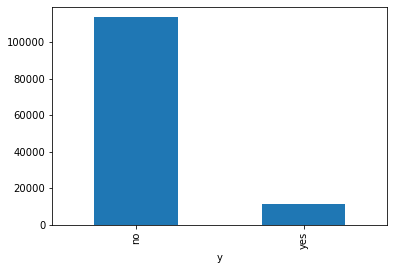

In [49]:
data.groupby('y')['campaign'].sum().plot(kind='bar')
#the campaigners have spent more than 100000 seconds of time but where as they have spent less than 20000 seconds on the customers
#the customers who actually subscribed to the term deposit, so company or the bank can save money as well as time by not  
#considering these impotent customers this can be predicted using Machine learning Models.

<AxesSubplot:xlabel='campaign', ylabel='y'>

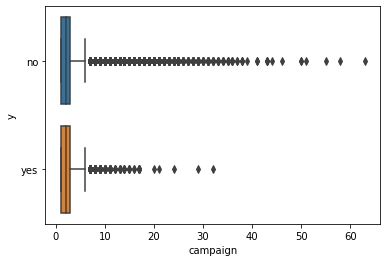

In [50]:
sns.boxplot(data['campaign'],data['y'])
#Most of the customers who were contacted by the campaigners more than 30 times are those who didnt actually subscribe to the 
#plan the customers who talked to the team 30+ times will be interested in the term deposit but he still rejects it due to some  
#rules in the policies which he/she didnt like and might have found that the policy from the other organization is better, these  
#are the potential cuustomers which the bank has lost, so with an extra feature containing information regarding the reason of 
#rejection of campaign and with this we could convert these people into our customer by improving the current policy.

<AxesSubplot:xlabel='poutcome', ylabel='count'>

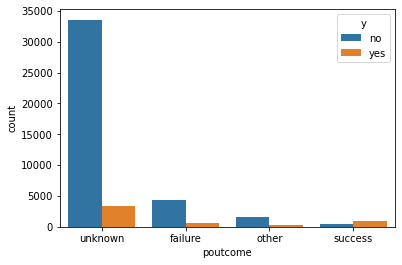

In [51]:
sns.countplot(data['poutcome'],hue=data['y'])
#most of the people are unaware of their futuristic decision regarding the subscription to the term deposit these are the 
#unknown class

In [52]:

suc_pout=(dfs.groupby('poutcome')['day'].count()/data.groupby('poutcome')['day'].count())*100

{0: 'success', 1: 'other', 2: 'failure', 3: 'unknown'}

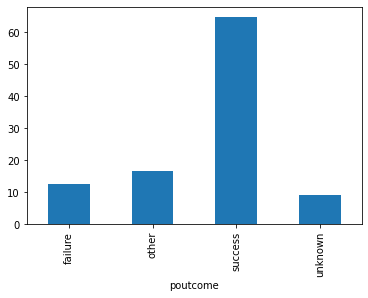

In [53]:
suc_pout.plot(kind='bar')
#maximum rate of convertion is for success class in poutcome they tend to agree to the campaign conducted by the team, 
#these are the most loyal subscribers to the organization
pot5=suc_pout
pot5.sort_values(ascending=False,inplace=True)
pot5=pd.DataFrame(suc_pout)
pot5.reset_index(inplace=True)
dic5=dict(pot5)
dic5=dict(dic5['poutcome'])
dic5

{0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}

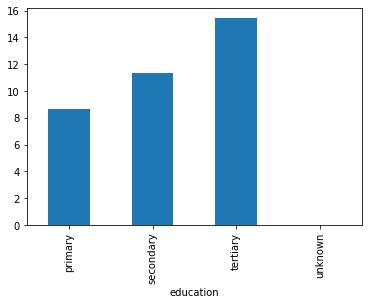

In [54]:
suc_rateed=(dfs.groupby('education')['y'].count()/data.groupby('education')['y'].count())*100
suc_rateed.sort_values().plot(kind='bar')
dfs['education'].value_counts()
suc_rateed=pd.DataFrame(suc_rateed)
pot1=suc_rateed.sort_values(by='y')
suc_rateed.reset_index(inplace=True)
suc_rateed.drop('y',axis=1,inplace=True)
pot1=dict(suc_rateed)
pot1=dict(pot1['education'])
pot1

{0: 'cellular', 1: 'telephone', 2: 'unknown'}

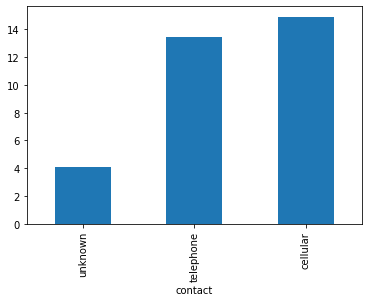

In [55]:
suc_t=(dfs.groupby('contact')['y'].count()/data.groupby('contact')['y'].count())*100
suc_t.sort_values().plot(kind='bar')
dfs['contact'].value_counts()
suc_t=pd.DataFrame(suc_t)
pot3=suc_t.sort_values(by='y')
suc_t.reset_index(inplace=True)
suc_t.drop('y',axis=1,inplace=True)
pot3=dict(suc_t)
pot3=dict(pot3['contact'])
pot3

In [56]:
#data pre-processing
#checking for null values 
df.isna().sum()
#there are no null values in the dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [57]:
#encoding categorical variables
df.select_dtypes(include=np.object)
#ordinal attributes-job,education
#nominal attributes-marital,default,housing,contact,month,poutcome

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
4,blue-collar,single,secondary,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [58]:
#encoding job column with the priority decided by the criteria of success_rates
df['job']=df['job'].replace(dic.values(),dic.keys())


In [59]:
#encoding marital column with the priority decided by the criteria of success_rates
df['marital'].replace(dic1.values(),dic1.keys(),inplace=True)


In [60]:
#encoding education column with the priority decided by the criteria of success_rates for each classs
df['education']=df['education'].replace(pot1.values(),pot1.keys())

In [61]:
#encoding default column with the priority decided by the criteria of success_rates for each classs
df['default'].value_counts()
pot2={'no':0,'yes':1}
df['default'].replace(pot2.keys(),pot2.values(),inplace=True)

In [62]:
#encoding 'housing','loan','y' column with the priority decided by the criteria of success_rates for each classs
df['housing'].replace(pot2.keys(),pot2.values(),inplace=True)
df['loan'].replace(pot2.keys(),pot2.values(),inplace=True)
df['y'].replace(pot2.keys(),pot2.values(),inplace=True)


In [63]:
#encoding contact column with the priority decided by the criteria of success_rates for each classs
df['contact'].replace(pot3.values(),pot3.keys(),inplace=True)

In [64]:
#encoding contact column with the priority decided by the criteria of success_rates for each classs
df['month'].replace(pot4.values(),pot4.keys(),inplace=True)

In [65]:
#encoding poutcome column with the priority decided by the criteria of success_rates for each classs
df['poutcome'].replace(dic5.values(),dic5.keys(),inplace=True)

In [66]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,3,2,2,0,2143,1,0,2,5,11,261,1,-1,0,3,0
1,44,6,0,1,0,29,1,0,2,5,11,151,1,-1,0,3,0
2,33,9,2,1,0,2,1,1,2,5,11,76,1,-1,0,3,0
3,47,10,2,1,0,1506,1,0,2,5,11,92,1,-1,0,3,0
4,33,10,0,1,0,1,0,0,2,5,11,198,1,-1,0,3,0


In [67]:
#tuning the outliers
pt=PowerTransformer()
df['duration']=pt.fit_transform(df[['duration']])
df['campaign']=pt.fit_transform(df[['campaign']])
df['previous']=pt.fit_transform(df[['previous']])
df['pdays']=pt.fit_transform(df[['pdays']])
df['balance']=pt.fit_transform(df[['balance']])
print('skewness before transformation')
for x in skewness:
    print(x)
print('================================================================================')
#skewness before performing power transformation
skewness_after=[]
for x in df1.columns:
    skewness_after.append([x,df[x].skew()])
print('skewness_after power transfomation')
for x in skewness_after:
    print(x)

skewness before transformation
['age', 0.6848179257252598]
['balance', 8.360308326166326]
['day', 0.09307901402122411]
['duration', 3.144318099423456]
['campaign', 4.898650166179674]
['pdays', 2.6157154736563477]
['previous', 41.84645447266292]
skewness_after power transfomation
['age', 0.6848179257252598]
['balance', 1.0985820972305558]
['day', 0.09307901402122411]
['duration', 0.018044666289406527]
['campaign', 0.23094231166038837]
['pdays', 1.6452130914215282]
['previous', 1.6460507361001584]


In [68]:
X=df.drop('y',axis=1)
Y=df['y']

# SMOTE

# Under Sampling the Data set to handle the imbalance in the Data

In [71]:
rus=RandomUnderSampler(sampling_strategy=0.88)
X_train,Y_train=rus.fit_resample(X_train,Y_train)

0    0.882999
1    0.117001
Name: y, dtype: float64

# Train-test split

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,stratify=Y,test_size=0.3,random_state=0) #stratify

# Decision Tree Classifier

In [72]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [73]:
ypred=dt.predict(X_test)

In [74]:
cm=confusion_matrix(Y_test,ypred)

In [75]:
cm

array([[9706, 2271],
       [ 346, 1241]], dtype=int64)

In [76]:
print(roc_auc_score(Y_test,ypred))
TPR=cm[1,1]/(cm[1,0]+cm[1,1])
TNR=cm[0,1]/cm[0,0]+cm[0,1]


0.796182575098386


# Classification report for Decision Tree CLassifier

In [77]:
cr=classification_report(Y_test,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     11977
           1       0.35      0.78      0.49      1587

    accuracy                           0.81     13564
   macro avg       0.66      0.80      0.68     13564
weighted avg       0.89      0.81      0.84     13564



# Tuning the hyperparameters using GridSearchCV

In [78]:
params=[{'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}]
gcv=GridSearchCV(dt,param_grid=params,scoring='roc_auc',verbose=2)
gcv.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20,
                                        30, 40, 50, 70, 90, 120, 150]}],
             scoring='roc_auc', verbose=2)

In [79]:
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 7}

# Implementing Loss function and then building the Decision tree classifier

In [80]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=7)  

In [81]:
dt1.fit(X_train,Y_train)
ypred=dt1.predict(X_test)

In [82]:
roc_auc_score(Y_test,ypred)

0.8227253096264796

In [83]:
confusion_matrix(Y_test,ypred)

array([[9489, 2488],
       [ 233, 1354]], dtype=int64)

In [84]:
print(classification_report(Y_test,ypred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87     11977
           1       0.35      0.85      0.50      1587

    accuracy                           0.80     13564
   macro avg       0.66      0.82      0.69     13564
weighted avg       0.90      0.80      0.83     13564



In [85]:
params=[{'criterion': ['gini', 'entropy'],'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20,30, 40, 50, 70, 90, 120, 150]}]
gcv=GridSearchCV(dt,param_grid=params,scoring='roc_auc',verbose=2)
gcv.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20,
                                        30, 40, 50, 70, 90, 120, 150]}],
             scoring='roc_auc', verbose=2)

In [86]:
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 7}

# Implementation of Cross Validation

In [87]:
cvd=cross_val_score(dt,X_train,Y_train,scoring='roc_auc',cv=10,)

In [105]:
print(1-cvd.mean())
print(cvd.var())
cvd.mean()

0.07720242792782472
0.0001221913929128497


0.9227975720721753

# ADABOOST Classifier

In [89]:
ab=AdaBoostClassifier(dt1,n_estimators=99)
ab.fit(X_train,Y_train)
ypred=ab.predict(X_test)
confusion_matrix(Y_test,ypred)

array([[9882, 2095],
       [ 270, 1317]], dtype=int64)

In [90]:
params={'n_estimators':np.arange(1,50)}
gcv=GridSearchCV(ab,param_grid=params,scoring='roc_auc',verbose=2)
gcv.fit(X_train,Y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=3; total time=   0.0s
[CV] END .....................................n

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=7),
                                          n_estimators=99),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='roc_auc', verbose=2)

In [91]:
gcv.best_params_

{'n_estimators': 4}

In [92]:
print(classification_report(Y_test,ypred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89     11977
           1       0.39      0.83      0.53      1587

    accuracy                           0.83     13564
   macro avg       0.68      0.83      0.71     13564
weighted avg       0.90      0.83      0.85     13564



In [93]:
roc_auc_score(Y_test,ypred)

0.827474540443222

# Implementing RandomForest

In [94]:
rf=RandomForestClassifier(criterion='gini',n_estimators=200)

In [95]:

rf.fit(X_train,Y_train)
ypred=rf.predict(X_test)

In [96]:
cm=confusion_matrix(Y_test,ypred)

In [97]:
roc_auc_score(Y_test,ypred)

0.8616066479866711

In [98]:
print(classification_report(Y_test,ypred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     11977
           1       0.41      0.89      0.56      1587

    accuracy                           0.84     13564
   macro avg       0.70      0.86      0.73     13564
weighted avg       0.92      0.84      0.86     13564



In [99]:
cv=cross_val_score(rf,X_test,Y_test,scoring='roc_auc',cv=10)
print('the averagea ROC-AUC Score of the model is',cv.mean())

0.9227975720721753

In [100]:
print('Bias Error',1-cv.mean())

0.07720242792782472

In [101]:
print('Variance Error',cv.var()*100)

0.01221913929128497

In [103]:
FNR=cm[0,1]/(cm[0,1]+cm[0,0])

In [104]:
print('False Negative Rate',FNR)

0.16840611171411873

# random forest is the best model which fits this data set with bias error  of 0.077 and variance error of 0.0122, and it gives false negative rate of 0.168 which is the least among all the models